### Pandas Excercise

- Add some basics of pandas also here
- create a series, create a dataframe, use conditional indexing, etc
- basically copy some basics from your notebook

In this excercise you are going to explore movie ratings downloaded from the webpage https://grouplens.org/datasets/movielens/. After some simple exploration tasks you will build a simple recommender system just by using pandas.

In [5]:
# import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Pandas Series

#### Create a numpy array from integers 1 to 5 called data and another one containing the characters A to E called indices 

In [7]:
data = np.arange(1,6)
indices = np.array(['A', 'B', 'C', 'D', 'E'])
print(data, indices)

[1 2 3 4 5] ['A' 'B' 'C' 'D' 'E']


#### Use the Pandas method pd.Series(data,indices) to create a pandas series calles series

In [25]:
sr = pd.Series(data,indices)


#### Access the third element of the Series by using the named index and by using the location index

In [24]:
print(sr['C'], sr[2]) # Unterschied zu pythons nativen dictionary type?

3 3


#### square each element of the series

In [26]:
sr*sr

A     1
B     4
C     9
D    16
E    25
dtype: int64

#### Create another series called seriesFromDict using a python dictionary. They keys of the dictionary should  be characters from C to F and all values are 0.5. Then use again pd.Series(myDict)

In [34]:
myDict = { "C":0.5, "D":0.5}
sr2 = pd.Series(myDict)
# auf help(pd.Series) hinweisen

#### add both pandas series

In [40]:
sr+sr2

A    NaN
B    NaN
C    3.5
D    4.5
E    NaN
dtype: float64

## 2. Pandas DataFrames: Basics

#### Use the following two numpy arrays to construct a ddataframe using the function pd.DataFrame(). Name the columns 'age' and 'country'

In [181]:
# country and age numpy arrays
country = np.random.choice(['USA', 'GER'], size=30)
age = np.random.randint(18,75,size=30)
temp = np.array([age,country])

In [184]:
# Hinweis: Data Frame ueber Dict erstellen, sonst Probleme mit typen
df = pd.DataFrame({'Age': age, 'Country': country})
df.dtypes

Age         int64
Country    object
dtype: object

In [185]:
df['Age'].count()
df['Age'].mean()
df['Age'].min()
df['Age'].max()
df['Age'].median()
df.std()

Age    15.260346
dtype: float64

#### compute the mean, median, min and max values of the column age

In [186]:
# in der gezeigten Liste kein Median aufgelisted, und was meinst du genau mit 25%,...
df.describe()

,Age
count,30.000000
mean,45.533333
std,15.260346
min,21.000000
25%,32.000000
50%,44.500000
75%,57.000000
max,73.000000


#### how many peoply from germany are older than 20 and younger than 30

In [106]:
sr_ger = pd.Series(df[df['Country']=='GER']['Age'],dtype=int)
sr_ger[(sr_ger>20) & (sr_ger <30)].count()

3

#### compute the mean and standard deviation of the age column grouped by the country.

In [212]:
#df_agg = df.groupby('Country').agg({'mean': np.mean})
df_agg = df.groupby('Country').agg(np.mean)
df_agg

,Age
Country,
GER,47.928571
USA,43.437500


#### Extract the the mean of the country GER

In [214]:
# oben doppelt the
df_agg['Age'][0]

47.92857142857143

#### add two further columns which are called lower and upper which contain mean - std and mean+std

In [216]:
dfg = df_agg.copy()
dfg['lower'] = df_agg-df.groupby('Country').agg(np.std)
dfg['upper'] = df_agg+df.groupby('Country').agg(np.std)
dfg

,Age,lower,upper
Country,,,
GER,47.928571,31.060466,64.796676
USA,43.437500,29.523628,57.351372


#### create two $2 \times 4$ matrices contraining the interger numbers 1 to 8 and 8 to 1
Hint (seq[start:stop:step] => a slice from start to stop, stepping step each time.)

In [154]:
up = np.arange(1,9).reshape(2,4)
up

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [155]:
down = np.arange(8,0,-1).reshape(2,4)
down

array([[8, 7, 6, 5],
       [4, 3, 2, 1]])

#### for each matrix create a dataframe with column names A to D and indices 0 and 1 for mat1 and 2 and 3 for mat 2

In [159]:
updf = pd.DataFrame(up,columns=['A','B','C','D'])
updf

,A,B,C,D
0,1,2,3,4
1,5,6,7,8


In [161]:
downdf = pd.DataFrame(down,columns=['A','B','C','D'])
downdf

,A,B,C,D
0,8,7,6,5
1,4,3,2,1


#### Append the two dataframes df1 and df2 using the pd.concat() command

In [164]:
df_concat = pd.concat([updf,downdf])
df_concat

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
0,8,7,6,5
1,4,3,2,1


#### compute the column wise sum and the row wise mean of the dataframe df_concat

In [168]:
df_concat.sum(axis=0)

A    18
B    18
C    18
D    18
dtype: int64

In [169]:
df_concat.mean(axis=1)

0    2.5
1    6.5
0    6.5
1    2.5
dtype: float64

In [218]:
# execute the code to create the dataframe
df_animals = pd.DataFrame({'Animal': ['Cat', 'Dog', 'Bird', 'Lion'], 'Sound': ['miau', 'wuff', 'chirp', 'rawr']})
df_animals

,Animal,Sound
0,Cat,miau
1,Dog,wuff
2,Bird,chirp
3,Lion,rawr


In [219]:
# execute the code to create the dataframe
df_names = pd.DataFrame({'Animal': ['Cat', 'Cat', 'Bird', 'Dog'], 'Name': ['Maya', 'Carlo', 'Tweety', 'Bolto']})
df_names

,Animal,Name
0,Cat,Maya
1,Cat,Carlo
2,Bird,Tweety
3,Dog,Bolto


#### Merge the two dataframes by using the column Animal as the key (method: pd.merge())
<font color='blue'> muss Reihenfolge beim merge beachtete werden, bzw. ist Reihenfolge der Spalten wichtig? </font>

a) use an inner join

b) use an outer join

In [224]:
pd.merge(df_names,df_animals,on='Animal')

,Animal,Name,Sound
0,Cat,Maya,miau
1,Cat,Carlo,miau
2,Bird,Tweety,chirp
3,Dog,Bolto,wuff


,Animal,Sound,Name
0,Cat,miau,Maya
1,Cat,miau,Carlo
2,Dog,wuff,Bolto
3,Bird,chirp,Tweety


In [226]:
df_o_merge = pd.merge(df_names,df_animals,on='Animal',how='outer')
df_o_merge

,Animal,Name,Sound
0,Cat,Maya,miau
1,Cat,Carlo,miau
2,Bird,Tweety,chirp
3,Dog,Bolto,wuff
4,Lion,NaN,rawr


#### drop the row which contains NaN by using the method dropna() on the merged dataframe

In [229]:
df_o_merge.dropna()

,Animal,Name,Sound
0,Cat,Maya,miau
1,Cat,Carlo,miau
2,Bird,Tweety,chirp
3,Dog,Bolto,wuff


#### drop the column which contains a NaN

In [230]:
df_o_merge.dropna(axis=1)

,Animal,Sound
0,Cat,miau
1,Cat,miau
2,Bird,chirp
3,Dog,wuff
4,Lion,rawr


## 3. A Simple Recommender System using Pandas 
In this part of the excercise you are going to work with a real datasat, i.e. the Movie Lens Data. This is a collection of movie ratings which are widely used in research projects about recommender systems. 

As in any Data Science project, we start with the data exploration task to get familiar with the data and maybe we find already a hidden pattern. Afterwards, we build a simple Movie Recommender System without using any fancy machine learning algorithm. Keep in mind that this will not be a robust recommender sytem, but it is a nice first start to get use to pandas.

**load the two csv files 'data/ml-latest-small/ratings.csv' and 'data/ml-latest-small/movies.csv' and name the dataframes ratings and movies**

In [139]:
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
movies = pd.read_csv('data/ml-latest-small/movies.csv')

**investigate the dataframes and answer the following questions**
- how much memory is used for the dataframes
- what columns kind of columns do we have (name and datatype)
- how many records are contained is the dataframes

In [141]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [143]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


**Merge the two dataframes ratings and movies on the key movieId and select the columns rating, userId and title. Give the resulting dataframe the name df**

In [238]:
df = pd.merge(ratings,movies,on='movieId')[['userId', 'title','rating']]
df.head()

,userId,title,rating
0,1,Dangerous Minds (1995),2.5
1,7,Dangerous Minds (1995),3.0
2,31,Dangerous Minds (1995),4.0
3,32,Dangerous Minds (1995),4.0
4,36,Dangerous Minds (1995),3.0


**Compute the mean, median and count of ratings per movie.**

In [264]:
df_agg = df.groupby('title')['rating'].agg({'mean' : 'mean', 'median' : np.median, 'count' : 'count' })
df_agg.head()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,median,count
title,,,
"""Great Performances"" Cats (1998)",1.750000,1.75,2
$9.99 (2008),3.833333,4.50,3
'Hellboy': The Seeds of Creation (2004),2.000000,2.00,1
'Neath the Arizona Skies (1934),0.500000,0.50,1
'Round Midnight (1986),2.250000,2.25,2


In [8]:
# habe es irgendwie ohne das Attribut 'rating' gemacht, ist es wichtig

rating             
                                             mean median count
title                                                         
"Great Performances" Cats (1998)         1.750000   1.75     2
$9.99 (2008)                             3.833333   4.50     3
'Hellboy': The Seeds of Creation (2004)  2.000000   2.00     1
'Neath the Arizona Skies (1934)          0.500000   0.50     1
'Round Midnight (1986)                   2.250000   2.25     2

**Extract only movies which have been rated more than 100 times and sort the resulting dataset in descending order with respect to the mean rating. Name the resulting df df_agg_100 and show the first 20 and the last 20 rows.**

Hint: 1.Conditional Indexing; 2.use the *sort_values* method on the dataframe.

In [278]:
df_agg_100 = df_agg[df_agg['count'] > 100].sort_values('mean', ascending=False)[:20]
df_agg_100

,mean,median,count
title,,,
"Godfather, The (1972)",4.487500,5.00,200
"Shawshank Redemption, The (1994)",4.487138,5.00,311
"Godfather: Part II, The (1974)",4.385185,5.00,135
"Usual Suspects, The (1995)",4.370647,4.50,201
Schindler's List (1993),4.303279,4.50,244
One Flew Over the Cuckoo's Nest (1975),4.256944,4.50,144
Fargo (1996),4.256696,4.50,224
Pulp Fiction (1994),4.256173,4.50,324
American Beauty (1999),4.236364,4.25,220


In [ ]:
<FILL-IN> = df_agg[df_agg[('rating', <FILL-IN>) > 100].<FILL-IN>([('rating', 'mean')], ascending=<FILL-IN>)
<FILL-IN>

rating             
                                                        mean median count
title                                                                    
Godfather, The (1972)                               4.487500   5.00   200
Shawshank Redemption, The (1994)                    4.487138   5.00   311
Godfather: Part II, The (1974)                      4.385185   5.00   135
Usual Suspects, The (1995)                          4.370647   4.50   201
Schindler's List (1993)                             4.303279   4.50   244
One Flew Over the Cuckoo's Nest (1975)              4.256944   4.50   144
Fargo (1996)                                        4.256696   4.50   224
Pulp Fiction (1994)                                 4.256173   4.50   324
American Beauty (1999)                              4.236364   4.25   220
Dark Knight, The (2008)                             4.235537   4.50   121
Casablanca (1942)                                   4.235043   4.50   117
Star Wars: Episode V - The Empire Strikes Back ...  4.232906   4.50   234
Memento (2000)                                      4.227273   4.50   132
Taxi Driver (1976)                                  4.224576   4.25   118
Monty Python and the Holy Grail (1975)              4.224138   4.50   145
Star Wars: Episode IV - A New Hope (1977)           4.221649   4.50   291
Dr. Strangelove or: How I Learned to Stop Worry...  4.209524   4.50   105
Princess Bride, The (1987)                          4.208589   4.00   163
Goodfellas (1990)                                   4.202290   4.00   131
Raiders of the Lost Ark (Indiana Jones and the ...  4.193182   4.00   220

In [279]:
df_agg[df_agg['count'] > 100].sort_values('count', ascending=False)[:20]

,mean,median,count
title,,,
Forrest Gump (1994),4.054252,4.00,341
Pulp Fiction (1994),4.256173,4.50,324
"Shawshank Redemption, The (1994)",4.487138,5.00,311
"Silence of the Lambs, The (1991)",4.138158,4.00,304
Star Wars: Episode IV - A New Hope (1977),4.221649,4.50,291
Jurassic Park (1993),3.706204,4.00,274
"Matrix, The (1999)",4.183398,4.50,259
Toy Story (1995),3.872470,4.00,247
Schindler's List (1993),4.303279,4.50,244


 We have not talked much about plotting yet. Making plots is one of the key ingredients to explore data sets. There will be another excercise which will cover plotting. However, we want to visualize the mean rating vs. the number of votings. **Therefore, please execute the commands below and set the arguments kind to 'scatter' and alpha to 0.3.**
 <font color='blue'> kann ich es auch mit meiner Version von  df_agg machen?</font>

ValueError: plot kind 'scatter' can only be used for data frames

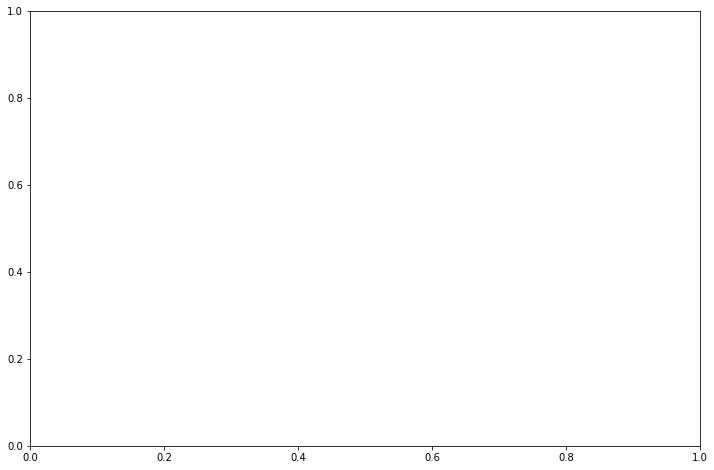

In [283]:
# create figure and axes object
fig, ax = plt.subplots(figsize=(12,8))
# use Pandas Built-in Plotting Function
df_agg['rating'].plot(kind='scatter', x='mean', y='count', alpha=0.3, ax=ax)

#### Can you interpret the plot? Does it make sense? Do you see any kind of correlation or pattern?

**Which movie got the worst rating out of the df_agg_100 dataframe **

Hint: idxmin()

Next, we want to create a so called feature matix, where the columns are the movie titles, the row indices are the userIds and the values are the corresponding ratings. Therefore, you can use the pivot_table method. Try to figure it out by your own. Use the Shortcut Shift+Tab to get the docstring of the function. Call the resulting dataframe feature_mat.
Afterwards, show the first 10 entries of the matrix.

In [ ]:
<FILL-IN> = df.<FILL-IN>
<FILL-IN>

Wow, there are many NaNs. Does the result make sense? Such a matrix is called a sparse matrix. Actually, there are better formats to store elements of such a matrix more efficiently. Those who are interested may have a look at Compressed Sparse Column (CSC).

** Please compute the percentage of null values in the matrix**

Hint: .isnull(), size, sum()

In [ ]:
nulls = feature_mat.<FILL-IN>
nulls / <FILL-IN>.<FILL-IN> * 100

98.355739546434492

## recommender system
There are many different ways to build a recommender. One popular approach is to use collaborative filtering, which is just a fancy name for recommending stuff based on the combination what you did and what everybody else did.

We want to discuss two approaches here:

1. Find similar users based on correlations between their ratings. If e.g. user A and B are highly correlated, recommend a highly rated movie by user A to user B (if he has not seen that movie yet). This approach is called the user based collaborative filtering.

2. Find similar items based on correlations between their ratings pattern. Afterwards recommend similar movies the user has not seen yet.

Both approaches are very similar, but we choose method 2. Can you think about any drawbacks of method 1?

**Compute the correlation matrix with the method corr() and call the resulting dataframe movie_corr.**

This may take a while. You can measure the time with the magic function %%time.

In [284]:
%%time
movie_corr = df.corr()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.57 ms


CPU times: user 26.1 s, sys: 20 ms, total: 26.1 s
Wall time: 26.2 s


**Use the correlation matrix to find which movies are highly correlated with Toy Story.**

Hint: Look at the dataframe with the .head() method. After you have seen the structure try to extract the column 'Toy Story (1995)'. The result will be a Pandas Series containing the correlation coefficients of Toy Story with all the other movies.

In [ ]:
<FILL-IN>

Do you know any of these movies? What happened? Did we do something wrong? Can you explain the result?

**Compute the correlation matrix again, but now only for movies which have been rated more than 100 times. Check again which movies are highly correlated wth Toy Story**

Hint: Use the argument min_periods of the correlation method.

In [ ]:
movie_corr_100 = <FILL-IN>
movie_corr_100<FILL-IN>.head(10)

** Now we create a dictionary which contains your own movie preferences. Please add your own ratings. **

In [124]:
myRatings = {'Dark Knight, The (2008)': <FILL-IN>, 'Mask, The (1994)': <FILL-IN>,
             'Titanic (1997)': <FILL-IN>, 'Star Wars: Episode IV - A New Hope (1977)': <FILL-IN>,
            'Star Wars: Episode I - The Phantom Menace (1999)': <FILL-IN>, 'Pulp Fiction (1994)': <FILL-IN>}

**The function below weights the similiraty score by your ratings and returns a sorted pandas Series containing your recommendations in descending order. Please just execute the function definition.**

In [40]:
def recommend(ratings):
    '''Find the movies which are highly correlated with your rated movies and weight them with your rating.'''

    recommendations = pd.Series()
    
    for key in myRatings:
        
        candidates = movie_corr_100[key].dropna()
        candidates = candidates.apply(lambda x: x * myRatings[key])
        recommendations = recommendations.append(candidates)

    recommendations.drop(list(myRatings.keys()), inplace=True)
    
    # aggregation, cause one movie can be similar two more than one other movie
    return recommendations.groupby(by=recommendations.index).agg('mean').sort_values(ascending=False)

**Use the function on your own rating dictionary.**

In [ ]:
myRecommendations = <FILL-IN>

**Finally we join the series with the df_agg_100 dataframe to add some summary statistics. Since we can only join two dataframes, we have to convert the series to a frame using the command to_frame**.

In [ ]:
<FILL-IN>.to_frame(name='score').join(df_agg_100['rating']).dropna().head(10)

### End of the Excercise
Great job! I hope you enjoyed the excercise.